<h1><center><b>Covid-19 Exploratory Data Analysis in Australia</b></center></h1>
<h3><center>Author: Cynthia Mather</center></h3>

## **Introduction**

The team and I decided to dedicate this EDA on understanding the general trend of COVID-19 across Australia while considering the driving question proposed. With that being said, the course of this report does not answer the question per say but explores the different approaches to answering the openness of the question using basic data exploration techniques.  

## **Part 1: EDA**

In this section, we will clean the data and perform EDA to get an understanding of the data.

The code below imports the essential packages required to perform data engineering and explore the data in terms of the driving question. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce
import pandas.plotting._converter as pandacnv
pandacnv.register()
pd.options.mode.chained_assignment = None 


Now that the required packages are imported, we can begin by reading in the main dataset. This dataset from https://www.covid19data.com.au/data-notes is Australian based and contains multiple state and federal health department sources. The team and I chose to explore Australia as the main country of interest as it is more sensible and meaningful. The code below accesses the state data from the github url ensuring that the newest data is being used as these datasets are updaded daily.

In [2]:
url='https://github.com/M3IT/COVID-19_Data/blob/master/Data/COVID_AU_state.csv?raw=true'
covid_raw = pd.read_csv(url)

Before conducting any cleaning on the data, we can create a copy of the data, ensuring the raw data is left untouched and look at the head and dimensions of the data to gain an initial understanding of the data. 

In [3]:
covid=covid_raw
covid.head(5)

,date,state,state_abbrev,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum
0,2020-01-25,Australian Capital Territory,ACT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-25,New South Wales,NSW,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Northern Territory,NT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Queensland,QLD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,South Australia,SA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
covid.shape

(2376, 19)

There are 2160 entries and 19 variables to explore the status of COVID-19 patients daily for each state in Australia.

To explore this data further, we need to ensure that the data is in the correct format, and the code below checks for this.

In [5]:
covid.dtypes

date             object
state            object
state_abbrev     object
confirmed         int64
confirmed_cum     int64
deaths            int64
deaths_cum        int64
tests             int64
tests_cum         int64
positives         int64
positives_cum     int64
recovered         int64
recovered_cum     int64
hosp              int64
hosp_cum          int64
icu               int64
icu_cum           int64
vent              int64
vent_cum          int64
dtype: object

All variables are of the appropriate data type except the date as this should be of a date format which will allow data exploration to be more meaningful. The code below converts the date stored as strings to dates. 

In [6]:
covid["date"] = pd.to_datetime(covid.date)

We can check for missing values in each of the variables. The code below counts the number of missing values in each column and outputs the total. 

In [7]:
covid.isna().sum()

date             0
state            0
state_abbrev     0
confirmed        0
confirmed_cum    0
deaths           0
deaths_cum       0
tests            0
tests_cum        0
positives        0
positives_cum    0
recovered        0
recovered_cum    0
hosp             0
hosp_cum         0
icu              0
icu_cum          0
vent             0
vent_cum         0
dtype: int64

There are no missing data and we can proceed to performing EDA. 

To look at Australia as a whole, we can accumulate the data for each date and look at the changing in confirmed cases, deaths and recoveries. The code below, groups the data by date and sums all other columns to produce data for all of Australia. 

In [8]:
covid_aus=covid.groupby("date",as_index=False).sum()
covid_aus.head(5)

,date,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum
0,2020-01-25,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can look at a timeline of cases reported each data across the whole of Australia. The code below plots the new COVID-19 cases as a function of date.

Text(0, 0.5, 'Number of New Cases')

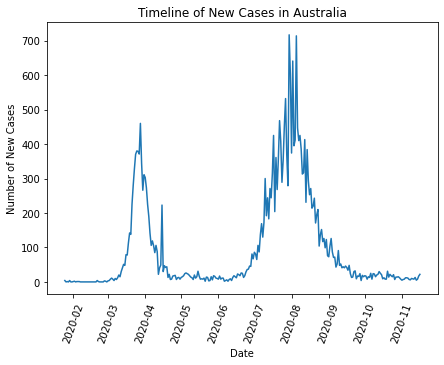

In [9]:
plt.figure(figsize=(7,5))
plt.plot(covid_aus["date"],covid_aus["confirmed"])
plt.title("Timeline of New Cases in Australia")
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

The peaks in the plot above indicate a high rate of new cases each day, during April and August. 

We do the same visualisation for new deaths recorded each day below. 

Text(0, 0.5, 'Number of New Deaths')

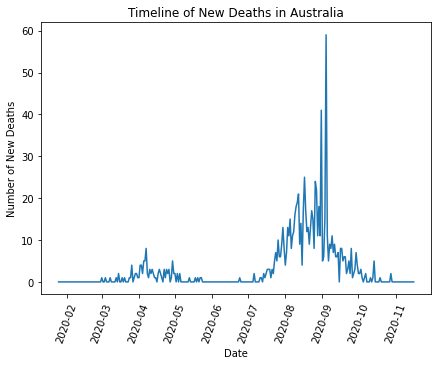

In [10]:
plt.figure(figsize=(7,5))
plt.plot(covid_aus["date"],covid_aus["deaths"])
plt.title("Timeline of New Deaths in Australia")
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Number of New Deaths")


The first thing to note is the y scale is very different, with the proportion of new deaths to new confirmed cases being very low. As we identified two 'waves' of COVID-19 earlier, the plot above illustrates the seriousness of the cases. Clearly the second wave is more deadly than the first but this could be a result of higher cases during this period.

Finally, we can illustrate the new recovery cases each date in Australia.

Text(0, 0.5, 'Number of Recovery')

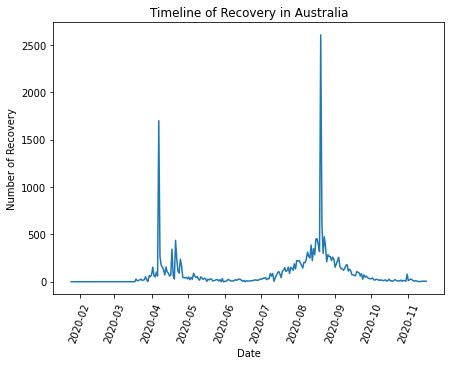

In [11]:
plt.figure(figsize=(7,5))
plt.plot(covid_aus["date"],covid_aus["recovered"])
plt.title("Timeline of Recovery in Australia")
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Number of Recovery")

This trend of two peaks is no different to the first two plots explored earlier and is expected. Looking at the y scale, we can definitely  conclude that there are more recovered cases as opposed to deaths with more recoveries in the second wave. This could again be a result of higher cases during the second wave period. 

## **Part 2: Addressing Driving Question**

The driving question is: How deadly is COVID-19?  How can we present data about this question so that the uncertainty is made very clear to the user of the visualisation of the results?

In this section, we will aim to address the different sources of uncertainty  that influence insights of data and in particular, we will explore the deaths in Australia. These uncertainties both qualitative and quantitative are explored in different stages from data collection to analysis. 

### Uncertainty  in data collection

One of the biggest influences in calculating mortality rates and comparing data from different countries is the method of data collection and the steps leading data from being observations to being recorded on a database as there are many confounding factors. As patient profiles such as age, sex, ethnicity etc. vary between countries and within Australia which significantly increases the uncertainty as calculating a rate like above assumes all deaths were COVID-19 related and provides a generic rate. As this virus impacts the respiratory system, it severely impacts individuals with respiratory conditions such as asthma as well as older people. Recalling the CFR calculated above of 3.5% assumes all individuals respond to the virus identically which is not the case.

Another significant influencer of uncertainty is the definitions and testing strategies that vary across the world and over time. We saw that testing in Australia was not constant over time, therefore calculating a single rate succumbs to a high uncertainty. With that in mind, the severity of this pandemic has changed over time and therefore its classification of mild/extreme cases has so too.




### Uncertainty in presenting and calculating vs actual data

There are time lags in which data is made available from different databases. As this pandemic is ongoing, data is updated daily and at different times and therefore the same analysis conducted between my team and myself can differ purely when it was performed (the date and time).

There are also different methods of calculating mortality rates such as an infection fatality ratio (IFR) which estimates the proportion of deaths among all infected individuals. However, to eliminate bias around real-time data, we can calculate the Case Fatality ratio that calculates the proportion of individuals who contracted the virus and die from it to therefore measure the severity among the detected cases. There are different methods of calculating mortality rate and with the appropriate context and reasoning, these rates can vary.

While there are common methods for calculating mortality rates, there are scientific uncertainties that are introduced when results are stated. One example is rounding error in which results may satisfy each other due to rounding to an appropriate, small number of significant figures but in fact when written in longer formats, different by a small fraction. Furthermore, across different analysis and calculations, comparing values of different significant figures similarly results to a higher variance from the true value.

### Uncertainity in calculating rate

As the driving question asks "how deadly" COVID-19 is, we will aim to provide a mortality rate in Australia. However, calculating such a rate succumbs to many challenges that influence how this rate is calculated and its uncertainty.

As this pandemic is still ongoing across the world and in specific, in Australia, calculating a fatality rate would use data from prior weeks rather than the present time. One method of calculating mortality is the Case Fatality Ratio (CFR) that takes into consideration calculating a rate during an ongoing epidemic. This ratio is calculated as a percentage by : 

$CFR=\frac{Number \ of \ deaths \ of \ disease}{Number \ of \ deathsv\ from \ disease \ + \ Number \ of \ recovered \ from \ disease}*100$



In [12]:
CFR=(covid_aus.iloc[-1]["deaths_cum"]/(covid_aus.iloc[-1]["deaths_cum"]+covid_aus.iloc[-1]["recovered_cum"]))*100
CFR=CFR.round(2)
CFR

3.48

The CFR gives a fatality rate of 3.52% that tells us the proportion of deaths among identified confirmed cases. This value is written to 3 significant figures as it ensures that an appropriate value is resulted without succumbing to too much rounding error. However, there are two main assumptions that drive these calculations to overestimate and underestimate the mortality rate:

1.  The likelihood of detecting deaths is consistent throughout the outbreak. From part 1, we saw that there was clearly two waves of the outbreak and the number of tests increased hence this assumption doesn't hold

2.   All detected cases have resolved. This formula assumes that all confirmed patients have recovered or died. This assumption is not satisfied as that requires the status of patients to change essentially within a day which is not the case of this pandemic as there are many active cases.





### Uncertainty between different datasets

Many public datasets provide similar COVID-19 data such as the confirmed cases, deaths and recoveries. Sources for Australia can come from Australian databases like what was seen in part 1, however there are also worldwide sources such as Johns Hopkins. However, as many sources obtain data from each other, we would expect a small uncertainty between each data source used. Furthermore, as sources obtain and update their data at different times, this influence the analysis being run as on a particular, the cases may not be updated in one source but are in another and therefore it is difficult to compare.


We can first look at a world-wide dataset from https://ourworldindata.org/coronavirus that comes from the European Centre for Disease Prevention and Control (ECDC) that aggregates the data from different sources for different countries, for example in Austalia, the source is the Australian Government Department of Health.

The code below reads in the data from the website, ensuring the newest, most updated version of the data is used.

In [13]:
url='https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid19data = pd.read_csv(url)

We can filter for cases in Australia and similar change the date format to be more useful for visualisation.

In [14]:
covid19data_aus=covid19data[covid19data["location"]=="Australia"]
covid19data_aus["date"]=pd.to_datetime(covid19data_aus["date"])

Uncertainity can be measured visually by comparing the new deaths in the two datasets.

In Australia, the first recorded case of COVID-19 was on the 19th of January 2020 from https://www.health.gov.au/ministers/the-hon-greg-hunt-mp/media/first-confirmed-case-of-novel-coronavirus-in-australia and therefore we can create a vector of dates from then to now

In [15]:
mortality=pd.DataFrame(pd.date_range(start='2020-01-19', end=datetime.today()),columns=["date"])

The code below appends the new deaths for the two datasets by joining with the new dataset on the "date" variable.

In [16]:
covid_aus_first = covid_aus[['date', 'deaths']].copy()
covid_aus_second = covid19data_aus[['date', 'new_deaths']].copy()
dfs=[mortality,covid_aus_first,covid_aus_second]
combined_deaths = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)

We can visualise the comparison for any offset in the data.

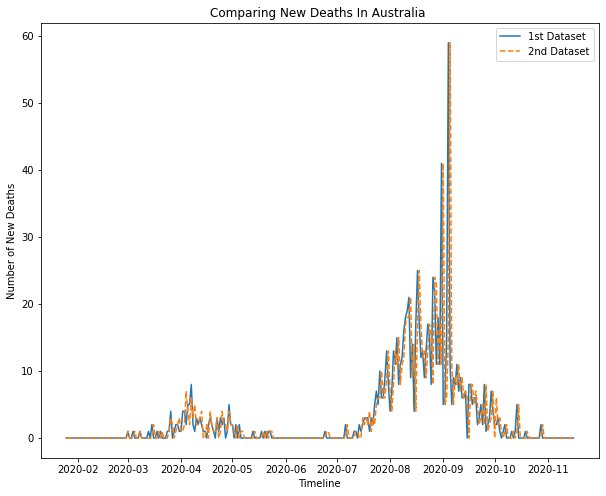

In [17]:
plt.figure(figsize=(10,8))
plt.plot(combined_deaths["date"], combined_deaths["deaths"], '-', label='1st Dataset')
plt.plot(combined_deaths["date"], combined_deaths["new_deaths"], '--', label='2nd Dataset')
plt.title('Comparing New Deaths In Australia ')
plt.ylabel('Number of New Deaths')
plt.xlabel('Timeline')
plt.legend()
plt.show()


There are offsets between the data visually as the two lines do not overlap in some dates. From August onwards, there seems to be a delay in the 2nd Dataset, and we can therefore conclude this result due to a delay in data. However, during the first wave, cases are not aligned between the two datasets and therefore this implies an uncertainty in the different datasets.  


Visually we can compare this uncertainty  but we can also quantify the uncertainty  to help indicate this magnitude. 

The code below loads in the world-wide data from the Johns Hopkins database and filters for all observations in Australia for the death and recovery cases so we can calculate CFR similarly and check for any variance.

In [18]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv?raw=true'
jh_death = pd.read_csv(url, index_col=0)
jh_death_aus=jh_death[jh_death['Country/Region']=="Australia"]

url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv?raw=true'
jh_recover = pd.read_csv(url, index_col=0)
jh_recover_aus=jh_recover[jh_recover['Country/Region']=="Australia"]


The code below computes the total deaths and recovery cases.

In [19]:
col_list= list(jh_death_aus)
col_list.remove('Country/Region')
col_list.remove('Lat')
col_list.remove('Long')
jh_death_aus_total=jh_death_aus[col_list].sum(axis=0)

col_list2= list(jh_recover_aus)
col_list2.remove('Country/Region')
col_list2.remove('Lat')
col_list2.remove('Long')
jh_recover_aus_total=jh_recover_aus[col_list2].sum(axis=0)

Finally, the code below calculates th CFR as a percentage using the Johns Hopkins data and formula from above. 

In [20]:
CFR_jh=(jh_death_aus_total.iloc[-1]/(jh_death_aus_total.iloc[-1]+jh_recover_aus_total.iloc[-1]))*100
CFR_jh_2=CFR_jh.round(2)
CFR_jh_2

3.43

From the Johns Hopkins Data Source, we obtain a CFR as a percentage of 3.48% and therefore there is an error of 0.04% between the two datasets. There are many factors that can influence this such as the time lag in the datasets and when they began. The uncertainty  can be further explored to check for significance as the magnitude for this error is significantly smaller than many of the other uncertainties explored. 

## Conclusion

In any mortality rate in understanding how deadly COVID-19 is, there are a significant number of confounding factors in that influence the rate and its uncertainty. In the media, we hear and see stats daily on how this pandemic is changing over time but never hear and therefore comprehend the uncertainty in these numbers that are provided. We have explored the main uncertainties that influence a single statistic, the mortality rate in Australia and have established that many uncertainties are difficult to quantify. As this analysis focused on only Australia and one author, the next stage of comparing different countries and the work of multiple analysts introduces new uncertainties that again need to be considered but are difficult to quantify or visualise.